In [1]:
from utils.set_seed import set_seed
# from pretrain import saving_root
# 设置随机种子
seed = 42
set_seed(seed)

In [20]:
from models.transformer.transformer import Transformer  # 替换为你的模型模块路径
from data.dataset import DT_Dataset
from pathlib import Path
from utils.lr_strategies import SchedulerFactory
from utils.load_full_checkpoint import load_full_checkpoint
import torch
DS = DT_Dataset
# 设置设备
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# 创建模型实例
d_model = 64
max_len = 2000
pad_idx = 1
learning_rate = 1e-2
n_epochs = 200
model = Transformer(src_len_max=max_len, trg_len_max=max_len, src_pad_idx=pad_idx, trg_pad_idx=pad_idx, d_src=1, d_trg=1, d_model=d_model, trg_size=1).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
scheduler_paras = {"scheduler_type": "warm_up", "warm_up_epochs": n_epochs * 0.25, "decay_rate": 0.99}
scheduler = SchedulerFactory.get_scheduler(optimizer, **scheduler_paras)
# 加载完整 checkpoint
checkpoint_path = "./runs/TD_ml_2000_padidx_1_bos_len_3_lr_0.001_epochs_1500_d_model_64_of_DCHTLN_RI_NONE_LF_loss_func_NZ_DATASET_f/best_(min_mse)_1333_0.0013.pt"
load_info = load_full_checkpoint(checkpoint_path, model, optimizer, scheduler, device)

In [3]:
#3nd DATASET INCLUDE ALL DATA
from data.dataset import DT_Dataset_all
from torch.utils.data import DataLoader
from utils.collate_fn import collate_fn
# outfall_names = ['DCHTLN', 'DCHWSC', 'HMGDX', 'HMGSM', 'HMGWS', 'JBHDT', 'JBHWZ', 'JHHHHC', 'JHHXY', 'JLH',
#                  'WFG',
#                  'XFG']
# _________dataset________
out_fall_name = 'DCHTLN'
max_patience = 12
batch_size = 100
ds_train = DT_Dataset_all(outfall_name = out_fall_name,max_patience=max_patience)
train_loader = DataLoader(dataset=ds_train, batch_size=batch_size, shuffle=False,collate_fn=collate_fn)
ds_val = DT_Dataset_all(outfall_name = out_fall_name,max_patience=max_patience,type='val')
val_loader = DataLoader(dataset=ds_val, batch_size=batch_size, shuffle=False,collate_fn=collate_fn)
batch_idx = 3  # 想要访问的批次索引
for i, (x_seq, y_seq, real_data) in enumerate(train_loader):
    if i == batch_idx:
        # 处理数据
        break

流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13

In [25]:
from torch import nn
from utils.metrics import calc_nse_torch
import torch
# set model to eval mode (important for dropout)
model.eval()
bos_len = 3
with torch.no_grad():
    #y_seq做了padding
    if x_seq.ndim == 2:
        x_seq = x_seq.unsqueeze(-1)
    if y_seq.ndim == 2:
        y_seq = y_seq.unsqueeze(-1)
    if real_data.ndim == 2:
        real_data = real_data.unsqueeze(-1)
    x_seq, y_seq, real_data = x_seq.to(device), y_seq.to(device),real_data.to(device)
    enc_inputs = x_seq
    batch_size = y_seq.size(0)
    trg_len = y_seq.size(1)
    n_labels = y_seq.size(2)
    dec_inputs = torch.zeros((batch_size, trg_len,n_labels)).to(device)
    dec_inputs[:,:bos_len,:] = y_seq[:,:bos_len,:]

    # get model predictions
    for i in range(bos_len, trg_len):
        decoder_predict = model(enc_inputs, dec_inputs)
        dec_inputs[:, i, :] = decoder_predict[:, i - 1, :]
    y_hat = dec_inputs[:, :, :]
    y_truth = real_data[:, :, :]

In [5]:
len(ds_train)

91

Saved to figures_TD_DCHTLN_inference\combined_plot_inference.svg


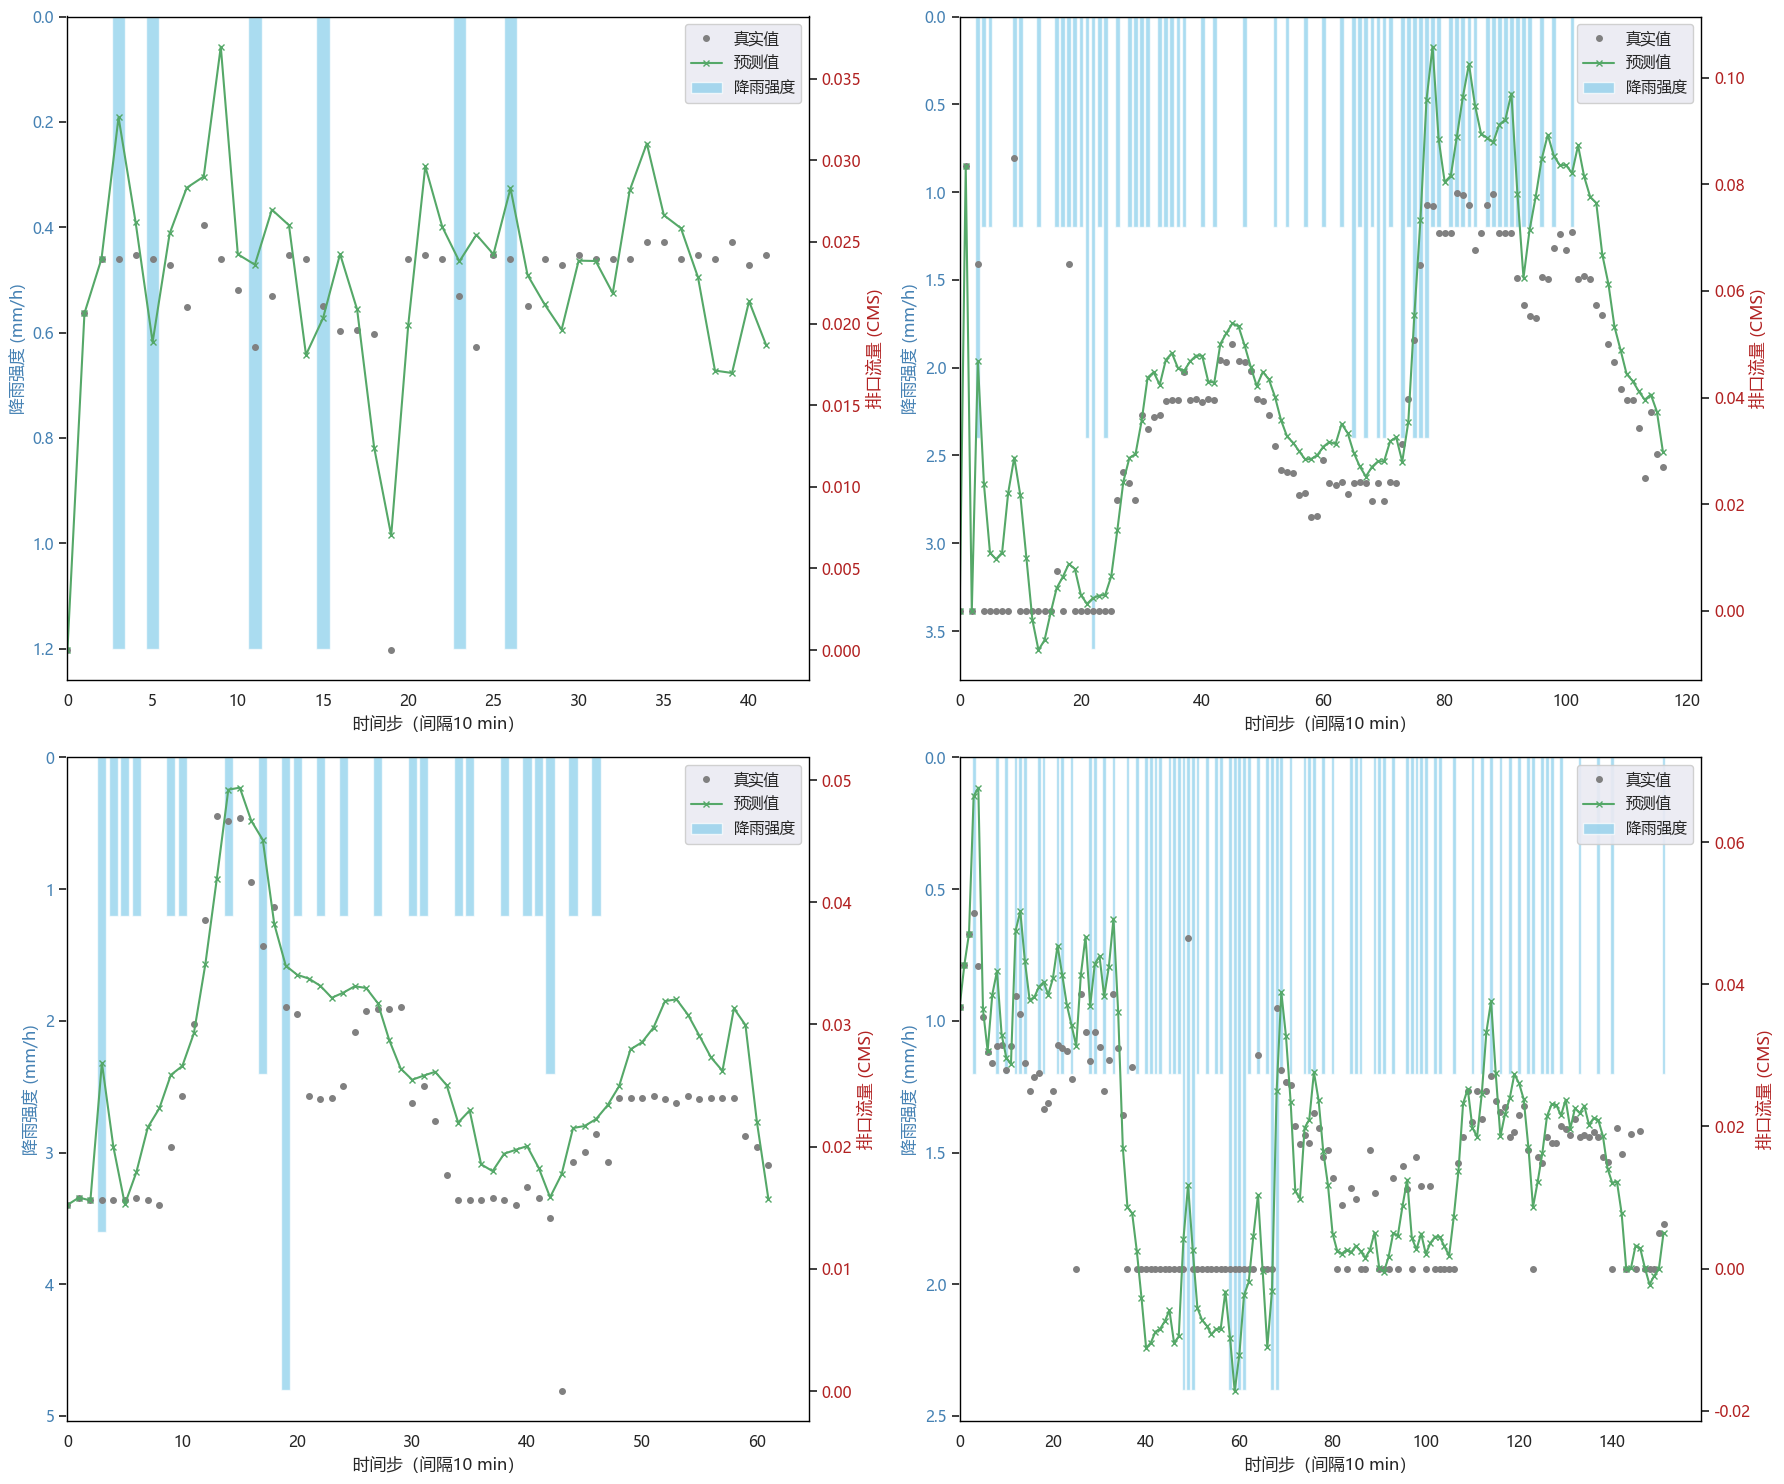

In [40]:
from utils.draw_ import plot_four_inference
plot_four_inference(x_seq, y_hat, y_seq, 'inference', idx_list=[5,22,9,14],
                           figures_folder='figures_TD_DCHTLN_inference', time_step='10 min', 
                           save=True)
# plot_multiple_inference(x_seq, y_hat, y_seq, 'inference', idx_list=list(range(48,54)),
#                            figures_folder='figures_TD_inference', time_step='10 min', 
#                            save=False)

In [ ]:
# 16 22  27 28 38 39  42 46 